# Import Libraries

In [ ]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Import

In [2]:
images=tf.keras.preprocessing.image_dataset_from_directory(directory='D:\\Projects\\Plant Villlage\\Potato_Images')

Found 2152 files belonging to 3 classes.


In [ ]:
len(images)

: 

In [4]:
print(images.class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


# Potato Leaves Overview

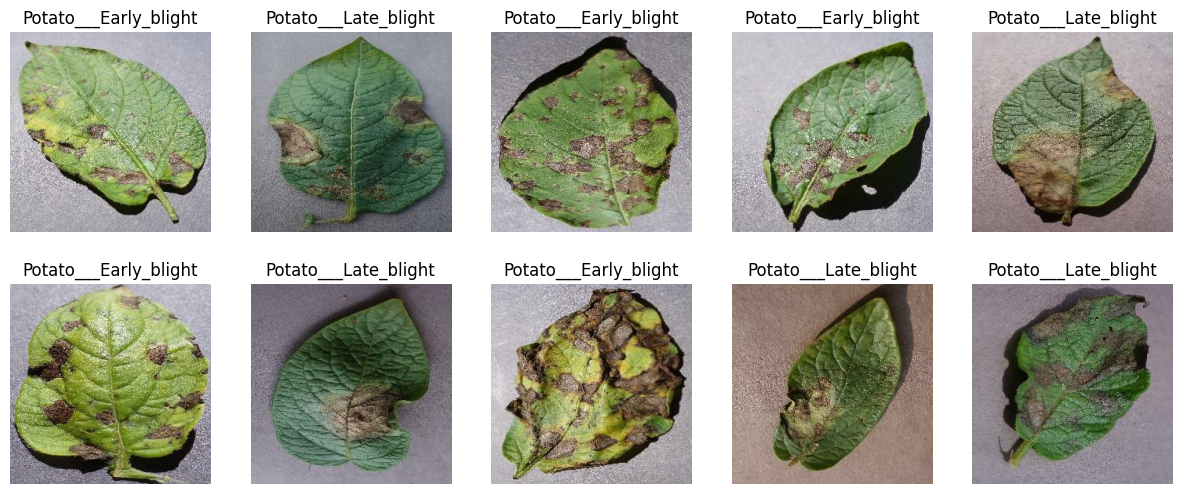

In [5]:
plt.figure(figsize=(15,6))
for image,img_class in images.take(1):
    for x in range(10):
        ax=plt.subplot(2,5,x+1)
        plt.imshow(image[x].numpy().astype('uint8'))
        plt.title(images.class_names[img_class[x]])
        plt.axis('off')

# Model Building

#### Train Test Split

In [60]:
train=images.take(int(0.8*len(images)))
test=images.skip(int(0.8*len(images))).take(int(0.1*len(images)))
val=images.skip(int(0.8*len(images))).skip(int(0.1*len(images)))

In [63]:
len(images),len(train),len(test),len(val)

(68, 54, 6, 8)

In [6]:
def train_test_val(dataset,train_size,shuffle=True):

    if shuffle:
        dataset=dataset.shuffle(len(dataset),seed=123)
        
    train=dataset.take(int(train_size*len(dataset)))
    val=dataset.skip(int(train_size*len(dataset))).take(int(((1-train_size)/2)*len(dataset)))
    test=dataset.skip(int(train_size*len(dataset))).skip(int(((1-train_size)/2)*len(dataset)))
        
    return train,test,val

In [7]:
train,test,val=train_test_val(images,train_size=0.8)

In [8]:
print('Total Dataset :',len(images))
print('Training Dataset :',len(train))
print('Testing Dataset :',len(test))
print('Validation Dataset :',len(val))

Total Dataset : 68
Training Dataset : 54
Testing Dataset : 8
Validation Dataset : 6


#### Rescale and Resize

In [105]:
rescale_resize=tf.keras.Sequential(
    [
       tf.keras.layers.experimental.preprocessing.Rescaling(scale=1.0/255),
       tf.keras.layers.experimental.preprocessing.Resizing(height=255,width=255) 
    ]
)

#### Data Augmentation

In [133]:
data_augmentation=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip(mode='horizontal_and_vertical',seed=12),
        tf.keras.layers.RandomRotation(factor=0.2,seed=12)
    ]
)

### Model Training

In [134]:
input_shape=(32,255,255,3) #batch_size,height,width,channels
model=tf.keras.Sequential(
    [
        rescale_resize,
        data_augmentation,
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(255,255),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=64,activation='relu'),
        tf.keras.layers.Dense(units=3,activation='softmax')
    ]
)
model.build(input_shape=input_shape)

In [135]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_13 (Sequential)  (32, 255, 255, 3)         0         
                                                                 
 conv2d_70 (Conv2D)          (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d_70 (MaxPooli  (32, 126, 126, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_71 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

In [136]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [138]:
history=model.fit(
    train,
    epochs=50,
    batch_size=32,
    validation_data=val
)

Epoch 1/50
54/54 [==============================] - 180s 3s/step - loss: 0.1976 - accuracy: 0.9207 - val_loss: 0.1476 - val_accuracy: 0.9286
Epoch 2/50
54/54 [==============================] - 172s 3s/step - loss: 0.1689 - accuracy: 0.9354 - val_loss: 0.1674 - val_accuracy: 0.9479
Epoch 3/50
54/54 [==============================] - 176s 3s/step - loss: 0.1500 - accuracy: 0.9472 - val_loss: 0.1979 - val_accuracy: 0.9323
Epoch 4/50
54/54 [==============================] - 180s 3s/step - loss: 0.1432 - accuracy: 0.9484 - val_loss: 0.2135 - val_accuracy: 0.8958
Epoch 5/50
54/54 [==============================] - 176s 3s/step - loss: 0.1489 - accuracy: 0.9366 - val_loss: 0.1121 - val_accuracy: 0.9583
Epoch 6/50
54/54 [==============================] - 175s 3s/step - loss: 0.1610 - accuracy: 0.9378 - val_loss: 0.2238 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 174s 3s/step - loss: 0.1387 - accuracy: 0.9519 - val_loss: 0.0725 - val_accuracy: 0.9702
Epoch 8/50
54

In [147]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting History

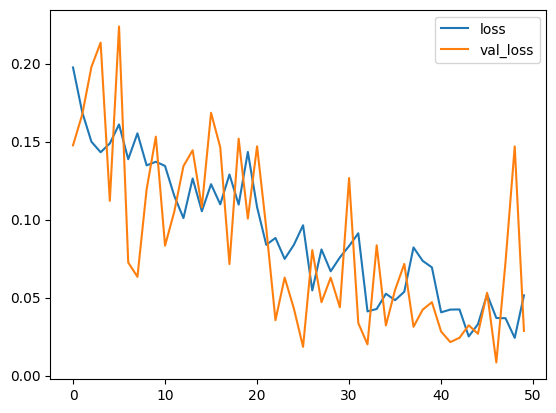

In [169]:
# Plotting Loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(loc='upper right',labels=['loss','val_loss'])
plt.show()

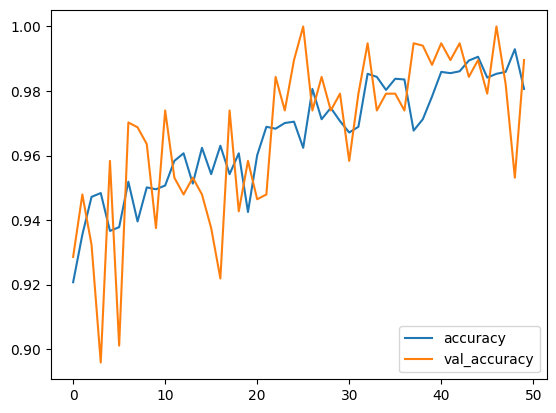

In [158]:
# Plotting Accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(loc='lower right',labels=['accuracy','val_accuracy'])
plt.show()

## Model Evaluation

In [159]:
model.evaluate(test)

8/8 [==============================] - 9s 829ms/step - loss: 0.0187 - accuracy: 0.9883


[0.018703393638134003, 0.98828125]

## Model Saving

In [168]:
model.save(filepath=os.path.join(os.getcwd(),'Potato_Images','Model'))

INFO:tensorflow:Assets written to: D:\Projects\Plant Villlage\Potato_Images\Model\assets


INFO:tensorflow:Assets written to: D:\Projects\Plant Villlage\Potato_Images\Model\assets


# Model Loading

In [19]:
model = tf.keras.models.load_model('Model')

## Predictor Function

In [78]:
def predictor(model,image):
    classes=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
    
    img_array=tf.keras.preprocessing.image.img_to_array(image)
    img_array=tf.expand_dims(img_array,0)
    
    predict_arr=model.predict(img_array,verbose=0)
    prediction=np.argmax(predict_arr[0])
    confidence=round(predict_arr[0][prediction]*100,2)
    label=classes[prediction]

    return label,confidence

In [54]:
for img,label in test.take(1):
    img_test=img[0].numpy()

## Loading Image

In [83]:
image_test=tf.keras.preprocessing.image.load_img(path='Potato_Images/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')

## Predicting Class and Confidence

In [84]:
l,c=predictor(model=model,image=image_test)
print(l,c)

Potato___Early_blight 100.0


1/1 [==============================] - 1s 839ms/step


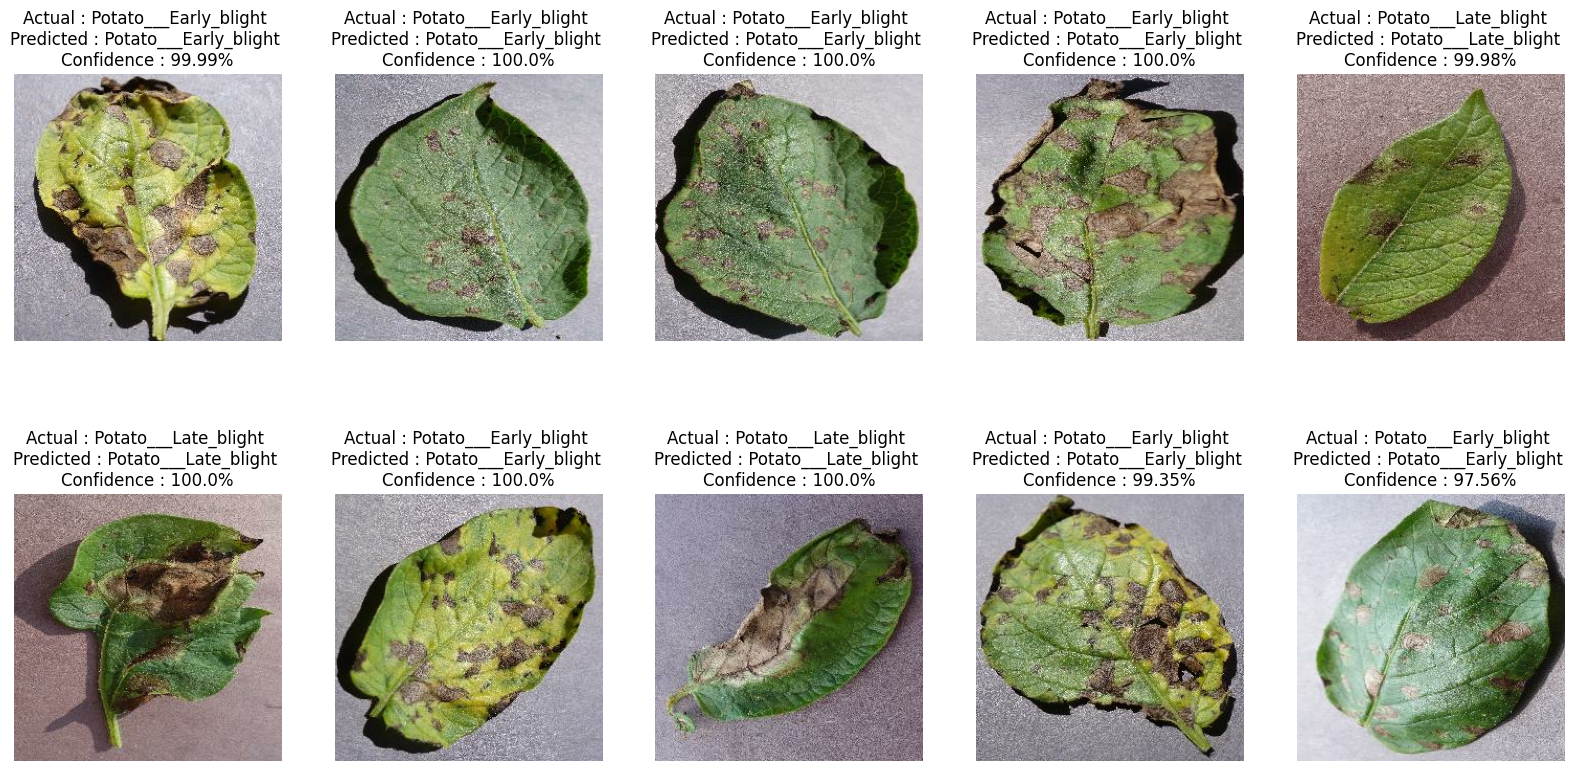

In [46]:
for image,label in test.take(1):
    pred=model.predict(image,verbose=0)
    predictions=[np.argmax(i) for i in pred]
    plt.figure(figsize=(20,10))
    for x in range(10):
        ax=plt.subplot(2,5,x+1)
        plt.imshow(image[x].numpy().astype('uint8'))
        plt.title(f'Actual : {images.class_names[label[x]]} \nPredicted : {images.class_names[predictions[x]]} \nConfidence : {round((pred[x][predictions[x]])*100,2)}%')
        #(f'Predicted : {images.class_names[predictions[x]]}')(f'Confidence : {pred[x][predictions[x]]}')
        plt.axis('off')